# Taller Econometria

Autor: Sergio Diaz Paredes

Contacto: [Linkedin](https://www.linkedin.com/in/sergio-diaz-paredes/)

# Importando paquetes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from pandas_datareader import wb

#¿Datos del banco mundial?

In [ ]:
indicadores_desempleo = wb.search('GDP')
indicadores_desempleo.query('id=="NY.GDP.MKTP.KD"')

,id,name,unit,source,sourceNote,sourceOrganization,topics
11011,NY.GDP.MKTP.KD,GDP (constant 2015 US$),,World Development Indicators,GDP at purchaser's prices is the sum of gross ...,"b'World Bank national accounts data, and OECD ...",Economy & Growth


In [ ]:
indicadores_desempleo = wb.search('CON')
indicadores_desempleo.query('id=="NE.CON.TOTL.KD"')

,id,name,unit,source,sourceNote,sourceOrganization,topics
10650,NE.CON.TOTL.KD,Final consumption expenditure (constant 2015 US$),,World Development Indicators,Final consumption expenditure (formerly total ...,"b'World Bank national accounts data, and OECD ...",Economy & Growth


# Importando datos

In [ ]:
pais = 'ESP'#['PE', 'BO','CL','EC','COL','ARG','ESP']

In [ ]:
inicio = 1995

In [ ]:
wb.download(indicator='NY.GDP.MKTP.KD',country=pais,start=inicio, end=2023).head()

NY.GDP.MKTP.KD
country year                
Spain   2023    1.356725e+12
        2022    1.323591e+12
        2021    1.251379e+12
        2020    1.176073e+12
        2019    1.323918e+12

# Caso 1: Modelo del consumo Keynesiano

$$Consumo_t = C_0 + C_1 \cdot PBI_t + ϵ_t $$

$$\text{K} = \frac{1}{1 - C_1}$$

Donde:

- $C_0:$ Consumo autonomo
- $C_1:$ Propension marguinal a consumir
- $K:$ Multiplicador keynesiano

## Importando PBI

In [ ]:
data = wb.download(indicator='NY.GDP.MKTP.KD',country=pais,start=inicio, end=2023)
data = data.reset_index()
data.rename(columns={'NY.GDP.MKTP.KD': 'PBI'}, inplace=True)

In [ ]:
data.head()

,country,year,PBI
0,Spain,2023,1.356725e+12
1,Spain,2022,1.323591e+12
2,Spain,2021,1.251379e+12
3,Spain,2020,1.176073e+12
4,Spain,2019,1.323918e+12


Cambiamos la escala a dolares constantes por miles millones de dolares constantes.

In [ ]:
data['PBI'] = data['PBI']/1e+9

Dando formato numerico a la columna year

In [ ]:
data['year'] = data['year'].astype(int)

In [ ]:
data.head()

,country,year,PBI
0,Spain,2023,1356.724567
1,Spain,2022,1323.591184
2,Spain,2021,1251.378537
3,Spain,2020,1176.072569
4,Spain,2019,1323.918490


## Importando el consumo agregado

In [ ]:
df = wb.download(indicator='NE.CON.TOTL.KD',country=pais,start=inicio, end=2023)
df = df.reset_index()
df.rename(columns={'NE.CON.TOTL.KD': 'Consumo'}, inplace=True)
df['Consumo'] = df['Consumo']/1e+9
df.head()

,country,year,Consumo
0,Spain,2023,1036.447029
1,Spain,2022,1013.138382
2,Spain,2021,980.142578
3,Spain,2020,924.487192
4,Spain,2019,1008.653731


Uniendo el consumo al data frame general

In [ ]:
data['Consumo'] = df['Consumo']
data.head()

,country,year,PBI,Consumo
0,Spain,2023,1356.724567,1036.447029
1,Spain,2022,1323.591184,1013.138382
2,Spain,2021,1251.378537,980.142578
3,Spain,2020,1176.072569,924.487192
4,Spain,2019,1323.918490,1008.653731


## Evolución

(0.0, 1393.3138060268589)

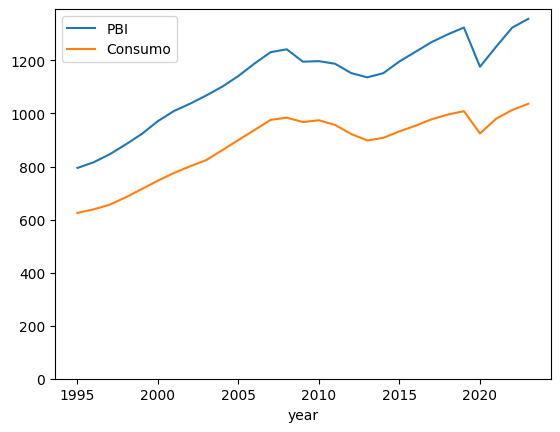

In [ ]:
data.set_index("year").plot()
plt.ylim(bottom=0)

## Dispersión

(0.0, 1057.0223905259752)

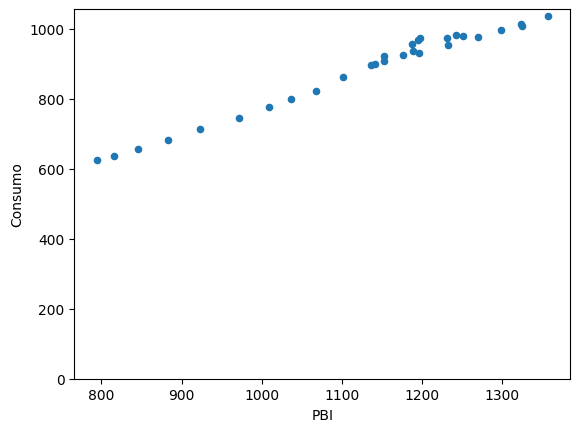

In [ ]:
data.plot(x='PBI',y='Consumo',kind='scatter')
plt.ylim(bottom=0)

## Modelo

Para definir el modelo es necesario indicar la relacion de los datos y cual es el data frame

In [ ]:
modelo_cons = smf.ols("Consumo ~ PBI",data)

Para estimar el modelo es necesario aplicar el metodo `.fit()`.

In [ ]:
modelo_cons = modelo_cons.fit()

Obteniendo resultados

In [ ]:
print(modelo_cons.summary())

                            OLS Regression Results                            
Dep. Variable:                Consumo   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1493.
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           3.59e-25
Time:                        17:19:12   Log-Likelihood:                -121.92
No. Observations:                  29   AIC:                             247.8
Df Residuals:                      27   BIC:                             250.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7527     22.941      0.164      0.8

Linea de tendencia

In [ ]:
modelo_cons.predict(exog=data).head()

,0
0,1060.468684
1,1034.661991
2,978.417521
3,919.763746
4,1034.916921


Agregando a la tabla

In [ ]:
data['Cons_fit'] = modelo_cons.predict(exog=data)
data.head()

,country,year,PBI,Consumo,Cons_fit
0,Spain,2023,1356.724567,1036.447029,1060.468684
1,Spain,2022,1323.591184,1013.138382,1034.661991
2,Spain,2021,1251.378537,980.142578,978.417521
3,Spain,2020,1176.072569,924.487192,919.763746
4,Spain,2019,1323.918490,1008.653731,1034.916921


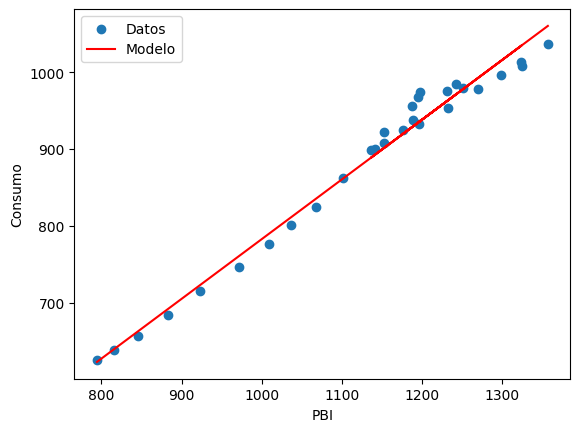

In [ ]:
fig, ax = plt.subplots()

ax.scatter(data['PBI'],data['Consumo'],label='Datos')
ax.plot(data['PBI'],data['Cons_fit'],label='Modelo',color='red')

ax.set_xlabel('PBI')
ax.set_ylabel('Consumo')
ax.legend()
plt.show()

Modelo obtenido

$$Consumo_t = C_0 + C_1 \cdot PBI_t + ϵ_t $$

$$Consumo_t = -4.2019 + 0.8026 \cdot PBI_t + ϵ_t $$

$$\text{K} = \frac{1}{1 - C_1} = \frac{1}{1 - 0.8026}=5.0658$$

## Residuos

<Axes: >

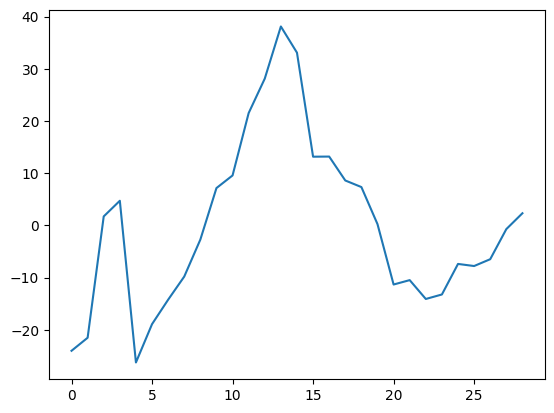

In [ ]:
modelo_cons.resid.plot()

# Caso 2: Modelo de la Curva de Phillips

$$\pi_t = A \cdot u_t^{\beta_1} $$

$$\text{A} = e^{\beta_0} $$

$$\pi_t = e^{\beta_0} \cdot u_t^{\beta_1} $$

$$ln(\pi_t) = ln(\beta_0) + {\beta_1} \cdot ln(u_t) $$

Donde:

- $\pi_t:$ Inflación
- $u_t:$ Tasa de desempleo

## Importando Inflación

In [ ]:
df = wb.download(indicator='FP.CPI.TOTL.ZG',country=pais,start=inicio, end=2023)
df = df.reset_index()
df.rename(columns={'FP.CPI.TOTL.ZG': 'inflacion'}, inplace=True)
df.head()

,country,year,inflacion
0,Spain,2023,3.532361
1,Spain,2022,8.390576
2,Spain,2021,3.093135
3,Spain,2020,-0.322753
4,Spain,2019,0.699519


Uniendo la inflacion al data frame general

In [ ]:
data['inflacion'] = df['inflacion']
data.head()

,country,year,PBI,Consumo,Cons_fit,inflacion
0,Spain,2023,1356.724567,1036.447029,1060.468684,3.532361
1,Spain,2022,1323.591184,1013.138382,1034.661991,8.390576
2,Spain,2021,1251.378537,980.142578,978.417521,3.093135
3,Spain,2020,1176.072569,924.487192,919.763746,-0.322753
4,Spain,2019,1323.918490,1008.653731,1034.916921,0.699519


## Importando la tasa de desempleo

In [ ]:
df = wb.download(indicator='SL.UEM.TOTL.ZS',country=pais,start=inicio, end=2023)
df = df.reset_index()
df.rename(columns={'SL.UEM.TOTL.ZS': 'desempleo'}, inplace=True)
df.head()

,country,year,desempleo
0,Spain,2023,12.144
1,Spain,2022,12.917
2,Spain,2021,14.781
3,Spain,2020,15.532
4,Spain,2019,14.104


Uniendo el desempleo al data frame general

In [ ]:
data['desempleo'] = df['desempleo']
data.head()

,country,year,PBI,Consumo,Cons_fit,inflacion,desempleo
0,Spain,2023,1356.724567,1036.447029,1060.468684,3.532361,12.144
1,Spain,2022,1323.591184,1013.138382,1034.661991,8.390576,12.917
2,Spain,2021,1251.378537,980.142578,978.417521,3.093135,14.781
3,Spain,2020,1176.072569,924.487192,919.763746,-0.322753,15.532
4,Spain,2019,1323.918490,1008.653731,1034.916921,0.699519,14.104


## Evolución

(0.0, 27.423718285495163)

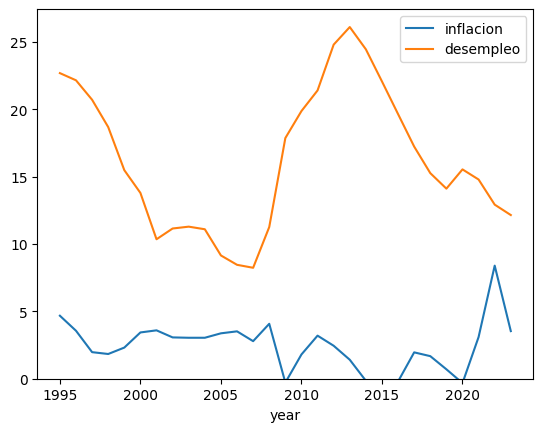

In [ ]:
data.set_index("year")[['inflacion','desempleo']].plot()
plt.ylim(bottom=0)

## Dispersión

(0.0, 8.835123443740745)

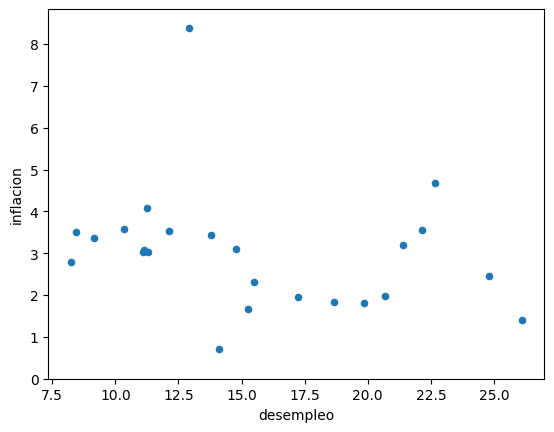

In [ ]:
data.plot(x='desempleo',y='inflacion',kind='scatter')
plt.ylim(bottom=0)

## Modelo

Para definir el modelo es necesario indicar la relacion de los datos y cual es el data frame

In [ ]:
modelo_phillips = smf.ols("np.log(inflacion) ~ np.log(desempleo)",data)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Para estimar el modelo es necesario aplicar el metodo `.fit()`.

In [ ]:
modelo_phillips = modelo_phillips.fit()

Obteniendo resultados

In [ ]:
print(modelo_phillips.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(inflacion)   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.194
Date:                Sun, 08 Sep 2024   Prob (F-statistic):              0.153
Time:                        17:19:14   Log-Likelihood:                -14.742
No. Observations:                  24   AIC:                             33.48
Df Residuals:                      22   BIC:                             35.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.1242      0.76

Linea de tendencia

In [ ]:
modelo_phillips.predict(exog=data).head()

,0
0,1.080448
1,1.054651
2,0.998300
3,0.977582
4,1.017900


Agregando a la tabla

In [ ]:
data['inflacion_fit'] = np.exp(modelo_phillips.predict(exog=data))
data.head()

,country,year,PBI,Consumo,Cons_fit,inflacion,desempleo,inflacion_fit
0,Spain,2023,1356.724567,1036.447029,1060.468684,3.532361,12.144,2.946001
1,Spain,2022,1323.591184,1013.138382,1034.661991,8.390576,12.917,2.870974
2,Spain,2021,1251.378537,980.142578,978.417521,3.093135,14.781,2.713665
3,Spain,2020,1176.072569,924.487192,919.763746,-0.322753,15.532,2.658021
4,Spain,2019,1323.918490,1008.653731,1034.916921,0.699519,14.104,2.767376


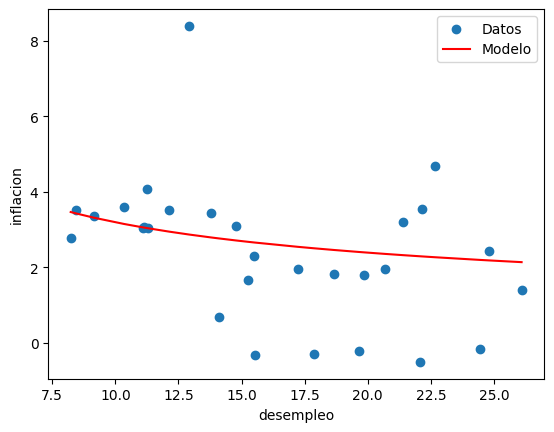

In [ ]:
data_graph = data.sort_values('desempleo')
fig, ax = plt.subplots()

ax.scatter(data_graph['desempleo'],data_graph['inflacion'],label='Datos')
ax.plot(data_graph['desempleo'],data_graph['inflacion_fit'],label='Modelo',color='red')

ax.set_xlabel('desempleo')
ax.set_ylabel('inflacion')
ax.legend()
plt.show()

Modelo obtenido Peru

$$\pi_t = A \cdot u_t^{-0.09} $$

$$\pi_t = A \cdot \frac{1}{u_t^{0.09}} $$

Modelo obtenido Chile

$$\pi_t = A \cdot u_t^{-1.1777} $$

$$\pi_t = A \cdot \frac{1}{u_t^{1.1777}} $$

Modelo obtenido Bolivia

$$\pi_t = A \cdot u_t^{-1.5819} $$

$$\pi_t = A \cdot \frac{1}{u_t^{1.5819}} $$

## Residuos

<Axes: >

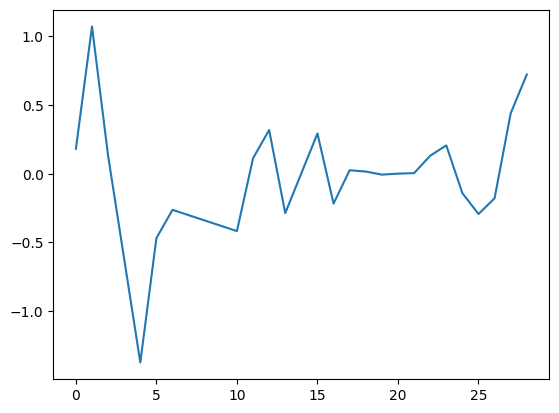

In [ ]:
modelo_phillips.resid.plot()

# Caso 3: Modelo de la Curva ambiental de kuznets

$$\text{Contaminacion}_t = \beta_0 + {\beta_1} \cdot PBI + {\beta_2} \cdot PBI^2$$

Siendo:

- $\beta_1 > 0$
- $\beta_2 < 0$

PBI optimo:

$$\frac{d\text{Contaminación}}{d\text{PBI}}={\beta_1} + 2 \cdot {\beta_2} \cdot PBI = 0$$

$$ 2 \cdot {\beta_2} \cdot PBI = - {\beta_1} $$

$$ PBI = \frac{- {\beta_1}}{2 \cdot {\beta_2}} $$

## Importando niveles de contaminación

In [ ]:
df = wb.download(indicator='EN.ATM.CO2E.KT',country=pais,start=inicio, end=2023)
df = df.reset_index()
df.rename(columns={'EN.ATM.CO2E.KT': 'co2'}, inplace=True)
df.head()

,country,year,co2
0,Spain,2023,NaN
1,Spain,2022,NaN
2,Spain,2021,NaN
3,Spain,2020,202705.8
4,Spain,2019,241886.5


Uniendo la contaminación al data frame general

In [ ]:
data['co2'] = df['co2']
data.head()

,country,year,PBI,Consumo,Cons_fit,inflacion,desempleo,inflacion_fit,co2
0,Spain,2023,1356.724567,1036.447029,1060.468684,3.532361,12.144,2.946001,NaN
1,Spain,2022,1323.591184,1013.138382,1034.661991,8.390576,12.917,2.870974,NaN
2,Spain,2021,1251.378537,980.142578,978.417521,3.093135,14.781,2.713665,NaN
3,Spain,2020,1176.072569,924.487192,919.763746,-0.322753,15.532,2.658021,202705.8
4,Spain,2019,1323.918490,1008.653731,1034.916921,0.699519,14.104,2.767376,241886.5


## Evolución

(0.0, 362281.96499999997)

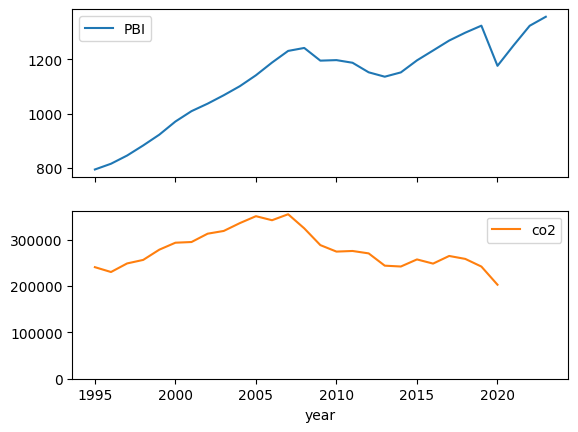

In [ ]:
data.set_index("year")[['PBI','co2']].plot(subplots=True)
plt.ylim(bottom=0)

## Dispersión

(0.0, 362281.96499999997)

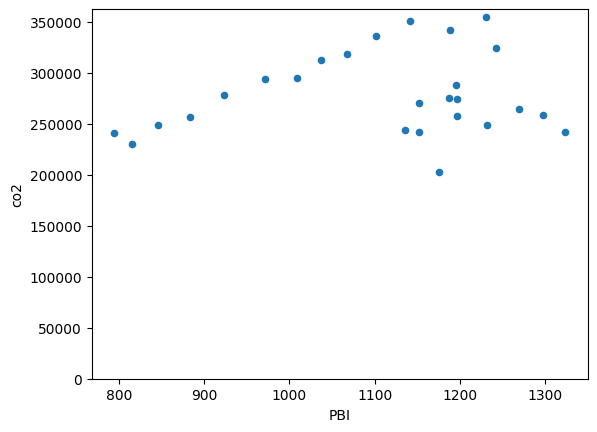

In [ ]:
data.plot(x='PBI',y='co2',kind='scatter')
plt.ylim(bottom=0)

## Modelo

Para definir el modelo es necesario indicar la relacion de los datos y cual es el data frame

In [ ]:
data_kuznets = data.query(" year <= 2020 ")
modelo_kuznets = smf.ols("co2 ~ PBI + np.power(PBI, 2)",data_kuznets)

Para estimar el modelo es necesario aplicar el metodo `.fit()`.

In [ ]:
modelo_kuznets = modelo_kuznets.fit()

Obteniendo resultados

In [ ]:
print(modelo_kuznets.summary())

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     2.992
Date:                Sun, 08 Sep 2024   Prob (F-statistic):             0.0700
Time:                        17:19:16   Log-Likelihood:                -309.07
No. Observations:                  26   AIC:                             624.1
Df Residuals:                      23   BIC:                             627.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -6.336e+05   3.85e+05  

Linea de tendencia

In [ ]:
modelo_kuznets.predict(exog=data).head()

,0
0,236620.037603
1,250251.992090
2,273911.136378
3,289747.336290
4,250125.870575


Agregando a la tabla

In [ ]:
data['co2_fit'] = modelo_kuznets.predict(exog=data)
data.head()

,country,year,PBI,Consumo,Cons_fit,inflacion,desempleo,inflacion_fit,co2,co2_fit
0,Spain,2023,1356.724567,1036.447029,1060.468684,3.532361,12.144,2.946001,NaN,236620.037603
1,Spain,2022,1323.591184,1013.138382,1034.661991,8.390576,12.917,2.870974,NaN,250251.992090
2,Spain,2021,1251.378537,980.142578,978.417521,3.093135,14.781,2.713665,NaN,273911.136378
3,Spain,2020,1176.072569,924.487192,919.763746,-0.322753,15.532,2.658021,202705.8,289747.336290
4,Spain,2019,1323.918490,1008.653731,1034.916921,0.699519,14.104,2.767376,241886.5,250125.870575


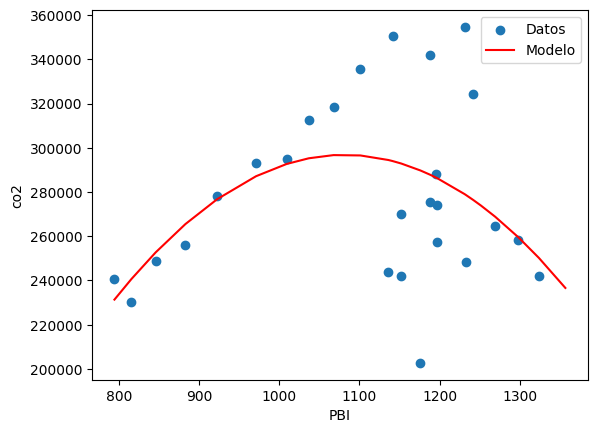

In [ ]:
data_graph = data.sort_values('PBI')
fig, ax = plt.subplots()

ax.scatter(data_graph['PBI'],data_graph['co2'],label='Datos')
ax.plot(data_graph['PBI'],data_graph['co2_fit'],label='Modelo',color='red')

ax.set_xlabel('PBI')
ax.set_ylabel('co2')
ax.legend()
plt.show()

## Residuos

<Axes: >

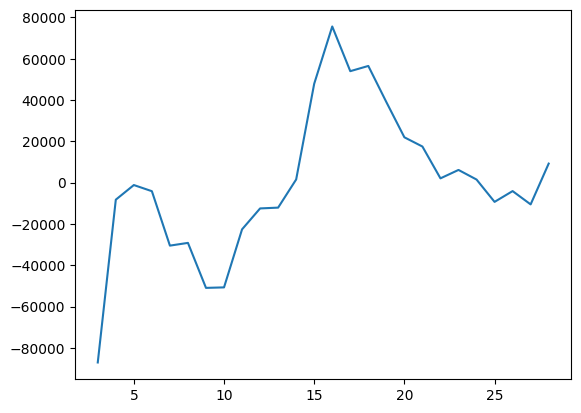

In [ ]:
modelo_kuznets.resid.plot()

# Caso 4: Importacion conjunta

# Importando datos

In [ ]:
paises = ['PE', 'BO','CL']

In [ ]:
inicio = 1995

## Desempleo

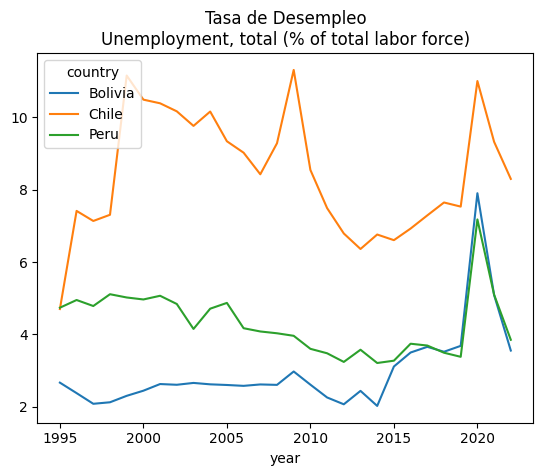

In [ ]:
desempleo = wb.download(indicator='SL.UEM.TOTL.ZS',country=paises,start=inicio, end=2022)
#datos
desempleo = desempleo.reset_index().pivot(index='year',columns='country')
desempleo.columns = desempleo.columns.levels[1]
desempleo.index = pd.to_numeric(desempleo.index)
desempleo.plot()
plt.title('Tasa de Desempleo\nUnemployment, total (% of total labor force)')
plt.show()

## Inflación

In [ ]:
indicadores_inflacion = wb.search('Consumer Price')
indicadores_inflacion.query('id=="FP.CPI.TOTL.ZG"')

,id,name,unit,source,sourceNote,sourceOrganization,topics
6873,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",,World Development Indicators,Inflation as measured by the consumer price in...,"b'International Monetary Fund, International F...",Economy & Growth ; Financial Sector


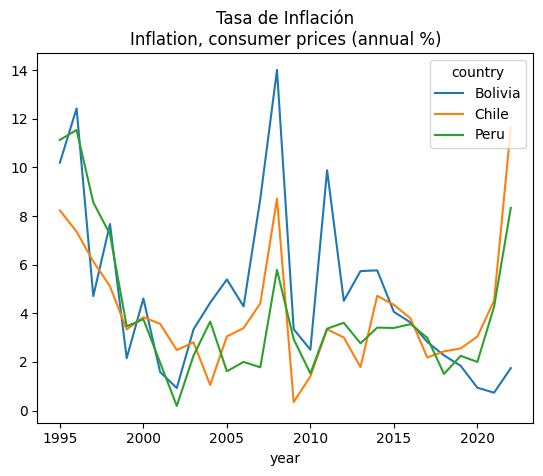

In [ ]:
inflacion = wb.download(indicator='FP.CPI.TOTL.ZG',country=paises,start=inicio, end=2022)
#datos
inflacion = inflacion.reset_index().pivot(index='year',columns='country')
inflacion.columns = inflacion.columns.levels[1]
inflacion.index = pd.to_numeric(inflacion.index)
inflacion.plot()
plt.title('Tasa de Inflación\nInflation, consumer prices (annual %)')
plt.show()

# Analizando en conjunto

## Generando data unida

In [ ]:
df_combined = pd.merge(desempleo.reset_index().melt(id_vars=['year'], var_name='country', value_name='desempleo'),
                       inflacion.reset_index().melt(id_vars=['year'], var_name='country', value_name='inflacion'),
                       on=['year', 'country'])

print(df_combined)

    year  country  desempleo  inflacion
0   1995  Bolivia      2.665  10.193207
1   1996  Bolivia      2.375  12.425487
2   1997  Bolivia      2.080   4.708444
3   1998  Bolivia      2.122   7.673229
4   1999  Bolivia      2.300   2.159516
..   ...      ...        ...        ...
79  2018     Peru      3.492   1.509154
80  2019     Peru      3.379   2.252122
81  2020     Peru      7.179   2.002412
82  2021     Peru      5.097   4.271664
83  2022     Peru      3.850   8.333706

[84 rows x 4 columns]


## Modelando curva de Phillips

In [ ]:
modelos = []
x_range = []
print(f"R cuadrado:")
for x in df_combined.country.unique():
  mi,ma = df_combined.query(f'country=="{x}"').desempleo.min(),df_combined.query(f'country=="{x}"').desempleo.max()
  x_ = np.arange(mi,ma,0.1)
  x_range.append(x_)
  modelo = smf.ols(formula='np.log(inflacion) ~ np.log(desempleo)', data=df_combined.query(f'country=="{x}"')).fit()
  print(f"{x}: {modelo.rsquared}")
  modelos.append(modelo)
  #print(modelo.summary())

R cuadrado:
Bolivia: 0.40423407823656066
Chile: 0.14626669581398166
Peru: 0.0008922267977734544


## Comparando resultados

In [ ]:
pip install stargazer

In [ ]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [ ]:
stargazer = Stargazer(modelos)
paises = df_combined.country.unique().tolist()
stargazer.custom_columns(paises)
stargazer.title("Modelo de la curva de Phillips")

html_table = stargazer.render_html()
HTML(html_table)

In [ ]:
y_fit = []
for i in range(0,3):
  y = modelos[i].predict(pd.DataFrame({'desempleo':x_range[i]}))
  y_fit.append(y)

In [ ]:
colores={'Peru':'r','Chile':'b','Bolivia':'g'}

In [ ]:
col = ['g','b','r']

In [ ]:
legend_handles = []
for country, color in colores.items():
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=country, markerfacecolor=color, markersize=10))

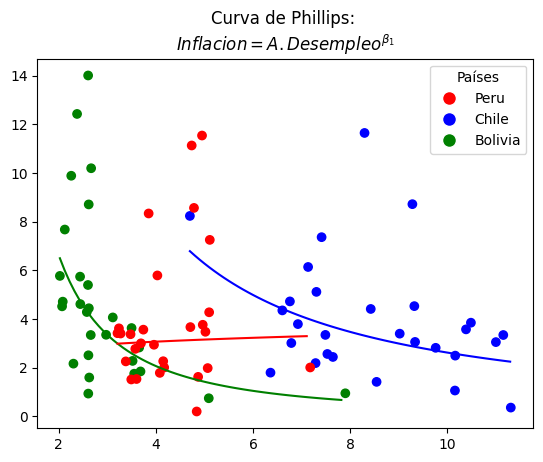

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y=df_combined['inflacion'],x=df_combined['desempleo'],c=df_combined['country'].map(colores))
ax.set_title(r'Curva de Phillips: ' + '\n' + r'$Inflacion = A.Desempleo^{\beta_1}$')
for i in range(0,3):
  ax.plot(x_range[i],np.exp(y_fit[i]),col[i])
ax.legend(handles=legend_handles, loc='upper right', title='Países')